# Actividad

En esta actividad vas a tener que implementar una mejor versión del predictor para el _dataset_ del accidente del Titanic. Para esto tienes dos opciones:

- Entrenar un predictor con el algoritmo _Random Forest_.
- Entrenar un predictor con el algoritmo _AdaBoost_.

Tu modelo, como mínimo, debe superar en _accuracy_ al `DummyClassifier`, y deseablemente, debe superar a la versión de _Random Forest_ utilizada en clases. Para mejorar el desempeño tienes algunas opciones:

- Trabajar mejor las _features_.
- No eliminar tantas filas debido a los nulos en la edad.
- Encontrar mejores hiperparámetros para el predictor.

Aunque evidentemente pueden haber más cosas.

**Importante**: debes utilizar el mismo _dataset_, y cuando hagas _split_ de este, debes fijar el `random_state` en 42, para que tus resultados siempre sean iguales.

## Qué se espera de la tarea

En esta tarea vas a tener que explicar en detalle:

- Cómo trabajaste las _features_.
- Cómo encontraste los parámetros de tu modelo.

Además, se espera que aparte del _accuracy_ obtengas la matriz de confusión, la precisión y el _recall_ de tu predictor. Finalmente, tienes que discutir los resultados, y entregar un análisis del comportamiento de tu predictor (ej. Funciona bien, mal, crees que puede mejorar, qué crees que hiciste bien, mal, etc.).

## Bonus (0.5 pts)

Si en vez de escoger una de las dos alternativas entre _Random Forest_ y _AdaBoost_ haces el análisis para ambos, te vas a llevar el bonus. Es necesario que solamente uno de ellos sea mejor que el modelo implementado en clases.

## Sobre este _dataset_

Este _dataset_ se ha propuesto como un [desafío introductiorio en Kaggle](https://www.kaggle.com/c/titanic). No es exactamente el mismo _dataset_, pero es bastante similar. Por lo mismo, puedes encontrar varios _notebooks_ y _posts_ en internet que hablan sobre cómo resolver de la mejor forma este desafío. Es importante que todo el código que uses **esté explicado y entiendas lo que hace**. Si estás ejecutando código que no sabes lo que hace, no estás aprendiendo, y el objetivo de esta tarea es que tengas un desafío real que te permita aprender.

## Detalles académicos

Esta actividad pueden realizarla en grupos de hasta dos personas. La entrega de esta actividad debe ser un archivo comprimido donde se encuentre un Jupyter Notebook con tu solución, junto a cualquier archivo que estés llamando desde tu código. La fecha de entrega es hasta el lunes 23 de noviembre hasta las 20:00 pm, cualquier entrega después de este plazo será calificada con la nota mínima. El archivo comprimido se entrega en el cuestionario correspondiente de Webcursos.

Primero que todo colocaremos los resultados obtenidos en clases, para así tener una referencia de a que llegar.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_excel('titanic3.xls')
X = df.drop(columns=['name', 'body', 'boat', 'cabin', 'home.dest', 'ticket'])
X = pd.get_dummies(X)

#X.isnull().sum()

X = X.dropna()
#X.isnull().sum()

y = X['survived']
X = X.drop(columns='survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dummy_clf = DummyClassifier(random_state=42)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_test, y_test))

0.5095541401273885
0.7611464968152867


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Para ver como estan distribuidas las correlaciones de los distintos features generaremos la matriz de correlación, a ver si obtenemos algun dato relevante.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


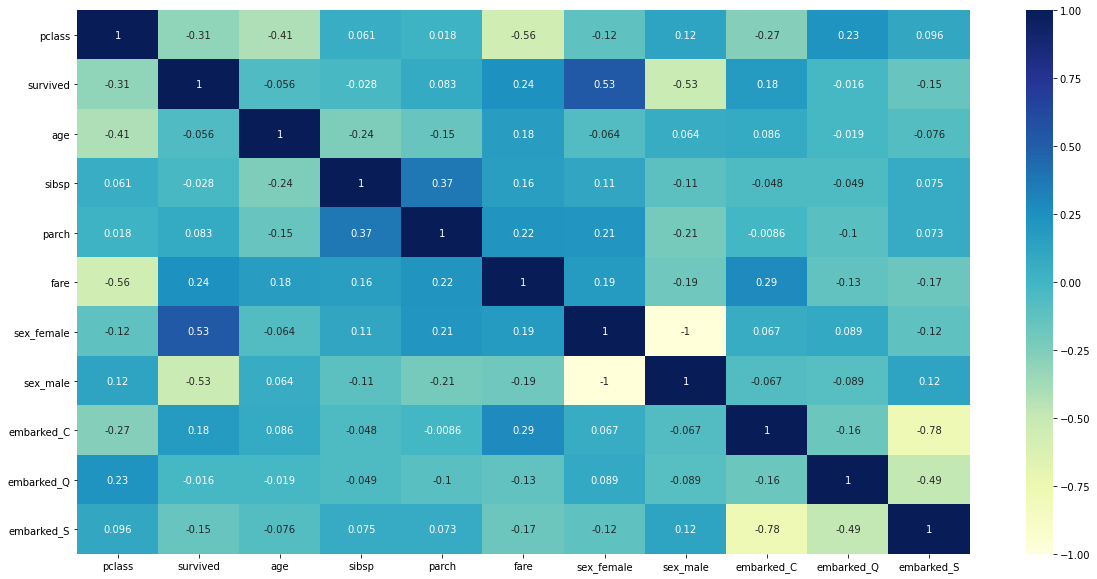

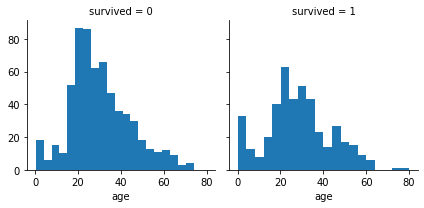

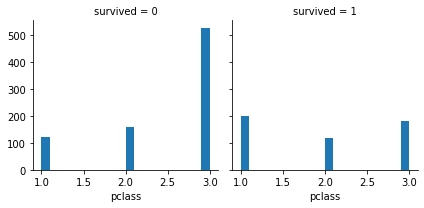

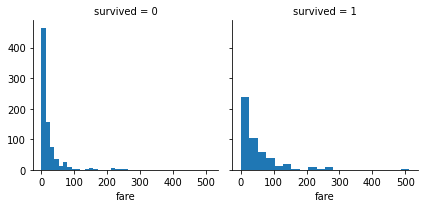

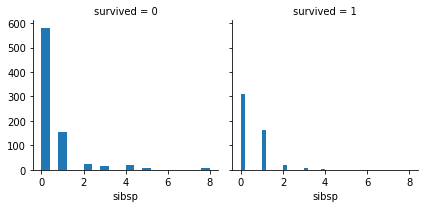

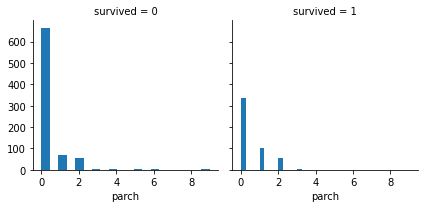

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_excel('titanic3.xls')
X = df.drop(columns=['name', 'body', 'boat', 'cabin', 'home.dest', 'ticket'])
X = pd.get_dummies(X)

plt.figure(figsize=(20,10))
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True,cmap='YlGnBu')

g = sn.FacetGrid(X, col='survived')
g.map(plt.hist, 'age', bins=20)

g = sn.FacetGrid(X, col='survived')
g.map(plt.hist, 'pclass', bins=20)

g = sn.FacetGrid(X, col='survived')
g.map(plt.hist, 'fare', bins=20)

g = sn.FacetGrid(X, col='survived')
g.map(plt.hist, 'sibsp', bins=20)

g = sn.FacetGrid(X, col='survived')
g.map(plt.hist, 'parch', bins=20)

Lo unico rescatable es que el sexo es una variable relevante para la predicción, y en menor medida también lo es Fare. De los histogramas vemos que muchas de las variables se distribuyen de buena manera respecto a lo que re refiere a Survived. Por ello realizaremos dos pruebas, cada una eliminando dos variables.
# Primeros cambios
El primer cambio que realizaremos es que rellenar los valores vacios con 0. De esta manera esperamos obtener un mejor resultado.

In [ ]:
df = pd.read_excel('titanic3.xls')


X = df.drop(columns=['name', 'body', 'boat', 'cabin', 'home.dest', 'ticket'])
X = pd.get_dummies(X)

X = X.fillna(0)

y = X['survived']
X = X.drop(columns='survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_pred=rf_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

0.7913486005089059


array([[195,  29],
       [ 53, 116]])

Como podemos notar existe una mejora respecto al valor previamente obtenido, así que en este momento pasaremos a revisar que features son los más relevantes.
# Analisis de Features 1
En este momento generaremos distintas pruebas, eliminando features los cuales no entregan mucha relevancia. Los dos primeros features que eliminaremos son Embarked y Sibsp, ya que embarked al generar el dummy puede que agregue ruido al modelo, mientras que sibsp en comparación a parch tiene un correlación negativa respecto a si sobreviven.

In [ ]:
X = df.drop(columns=['name', 'body', 'boat', 'cabin', 'home.dest', 'ticket', 'embarked', 'sibsp'])

X = pd.get_dummies(X)

promedio = X['age'].mean()
X['age'] = X['age'].fillna(promedio)
X['fare'] = X['fare'].fillna(0)

y = X['survived']
X = X.drop(columns='survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_pred=rf_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

0.8015267175572519


array([[197,  27],
       [ 51, 118]])

El resultado obtenido claramente presenta una mejora, por lo que ahora eliminaremos age y pclass, ya que sus correlaciones con survived son negativas.
# Analisis de Features 2


In [ ]:
X = df.drop(columns=['name', 'body', 'boat', 'cabin', 'home.dest', 'ticket','age','pclass'])

X = pd.get_dummies(X)

X['fare'] = X['fare'].fillna(0)

y = X['survived']
X = X.drop(columns='survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_pred=rf_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

0.7506361323155216


array([[181,  43],
       [ 55, 114]])

El modelo obtenido es peor al que se realizó en clases, por lo que se puede asumir que estas variables tienen relevancia frente a survived. 
Con esto claro podemos asumir que el mejor valor obtenido por un modelo es el cual tiene a las variables age, pclass, parch, fare y sex.
# Precision vs Recall
Ya para terminar, utilizaremos el modelo obtenido para graficar sus precion vs recall y ver si este se ajusta a lo buscado.

Average precision-recall score: 0.63
score: 0.7506361323155216


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.63')

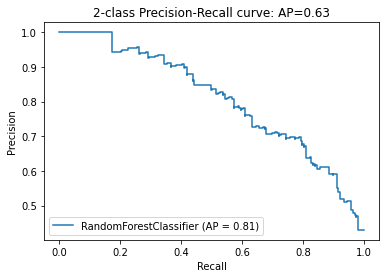

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix

X = df.drop(columns=['name', 'body', 'boat', 'cabin', 'home.dest', 'ticket','age','pclass'])

X = pd.get_dummies(X)

X['fare'] = X['fare'].fillna(0)

y = X['survived']
X = X.drop(columns='survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred=rf_clf.predict(X_test)
confusion_matrix(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
score=rf_clf.score(X_test, y_test)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('score:',score)
disp = plot_precision_recall_curve(rf_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))